In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_real = pd.read_csv("./real_data.csv")
data_real.head()

,Ghost,Electron,Muon,Pion,Kaon,Proton,P,Pt,Eta,sWeight,Label
0,0.001559,0.005725,-2.000000,0.950925,0.001386,0.000352,16050.00,1028.440,3.43978,0.840332,Muon
1,0.000688,0.000004,0.999016,0.024875,0.000034,0.000001,46090.40,4886.740,2.93440,-0.358999,Muon
2,0.818761,0.000093,-2.000000,0.184746,0.056222,0.129658,20097.80,424.478,4.55054,-0.380668,Muon
3,0.000926,0.000010,-2.000000,0.990758,0.000460,0.001161,15308.00,2672.600,2.43077,-0.386030,Muon
4,0.713529,0.000550,-2.000000,0.219517,0.300640,0.256067,9842.55,424.264,3.83680,0.169584,Muon


In [3]:
data_mc = pd.read_csv("./mc_data.csv")
data_mc.head()

,Ghost,Electron,Muon,Pion,Kaon,Proton,P,Pt,Eta,Label
0,0.066595,0.291686,0.832873,0.159447,0.532071,0.385719,282192.875000,4498.217773,4.831993,Electron
1,0.893579,0.936163,0.002398,0.003809,0.000588,0.000474,2287.530029,110.991821,3.718330,Electron
2,0.044965,0.989514,0.000145,0.001770,0.112768,0.064890,5883.500000,465.838043,3.227645,Electron
3,0.125714,0.998046,0.004614,0.163276,0.135551,0.012188,8357.629883,337.342407,3.902571,Electron
4,0.043698,0.985225,0.000123,0.055827,0.508141,0.533732,9521.540039,319.172119,4.088448,Electron


In [86]:
np.unique(data_real["Label"], return_counts=True)

(array(['Electron', 'Kaon', 'Muon', 'Pion', 'Proton'], dtype=object),
 array([  698174, 19278192,  2000000, 18546801,  2000000]))

In [88]:
np.unique(data_mc["Label"], return_counts=True)

(array(['Electron', 'Ghost', 'Kaon', 'Muon', 'Pion', 'Proton'],
       dtype=object),
 array([ 999999,  999998,  999997,  999996,  999998, 1000002]))

In [89]:
np.array(data_real)

array([[0.00155943, 0.00572514, -2.0, ..., 3.4397800000000003, 0.840332,
        'Muon'],
       [0.0006882710000000001, 3.78186e-06, 0.999016, ..., 2.9344,
        -0.35899899999999996, 'Muon'],
       [0.818761, 9.329729999999999e-05, -2.0, ..., 4.55054, -0.380668,
        'Muon'],
       ...,
       [0.0115006, 0.752474, -2.0, ..., 3.27415, 1.1239, 'Electron'],
       [0.95921, 0.999869, -2.0, ..., 2.7157400000000003, 1.03062,
        'Electron'],
       [0.00153787, 0.9072040000000001, -2.0, ..., 3.11994, 1.04318,
        'Electron']], dtype=object)

In [90]:
data_real_balanced = []
counts = {x: 0 for x in np.unique(data_real["Label"])}
for row in np.array(data_real):
    if counts[row[-1]] ==698174:
        continue
    counts[row[-1]] += 1
    data_real_balanced.append(row)

In [91]:
data_real_balanced = pd.DataFrame(np.array(data_real_balanced), columns=data_real.columns, index=None)

In [93]:
np.unique(data_real_balanced["Label"], return_counts=True)

(array(['Electron', 'Kaon', 'Muon', 'Pion', 'Proton'], dtype=object),
 array([698174, 698174, 698174, 698174, 698174]))

In [98]:
from matplotlib.colors import LogNorm
def plot_h2d_hist(data, particle_type, data_type="REAL (balanced)",  bins=[100, 1000], ylim=500000):
    plt.hist2d(data[particle_type], data["P"], bins=[100, 1000], norm=LogNorm());
    plt.title("2d hist {}-P {}".format(particle_type.upper(), data_type))
    plt.xlabel(particle_type)
    plt.ylabel("P")
    plt.ylim(0, ylim)
    plt.show()

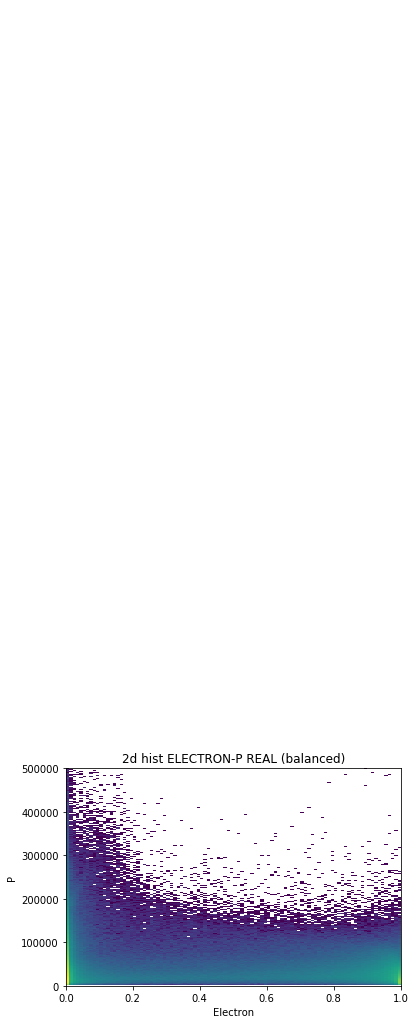

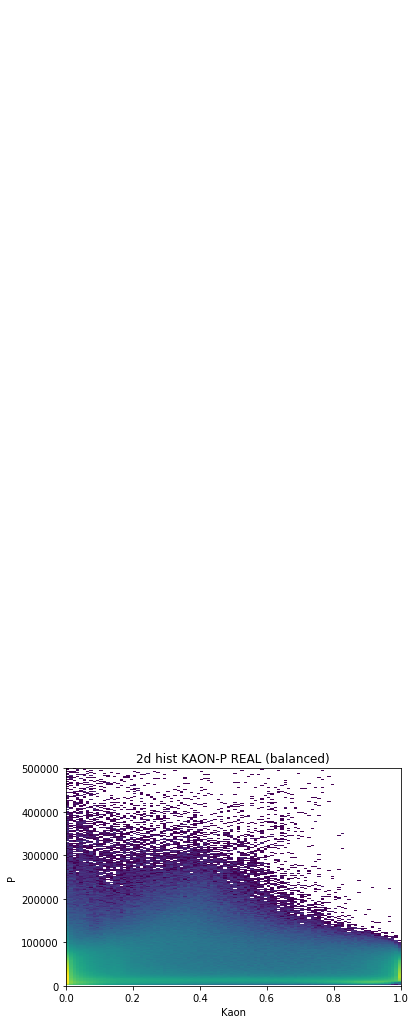

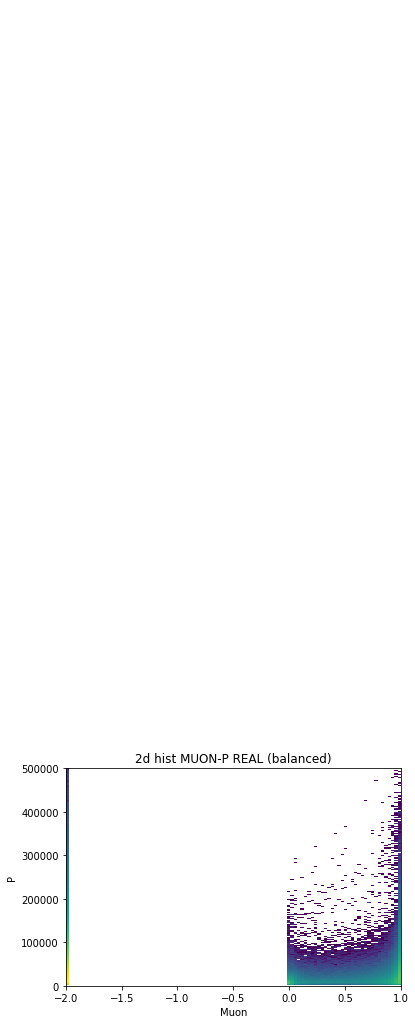

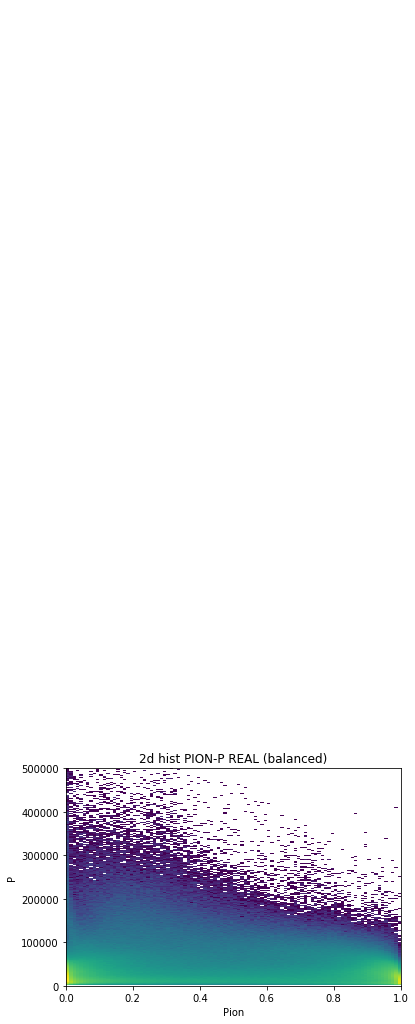

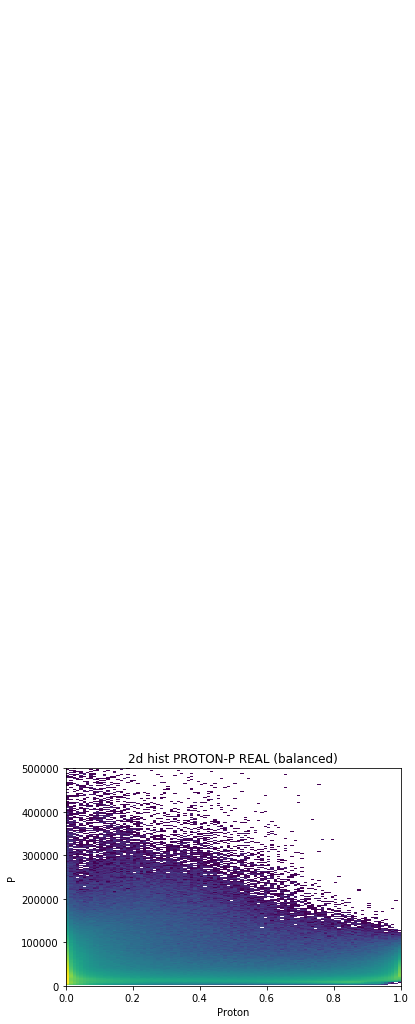

In [99]:
for particle_type in np.unique(data_real_balanced["Label"]):
    plot_h2d_hist(data_real_balanced, particle_type)

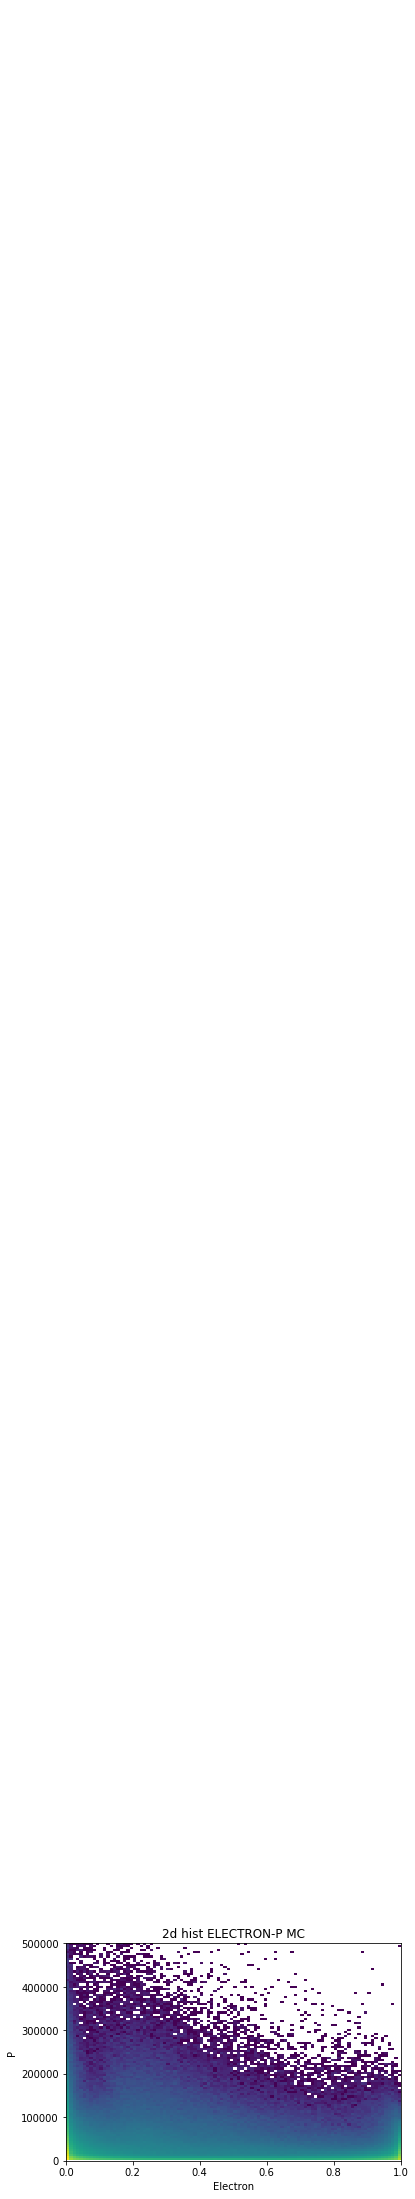

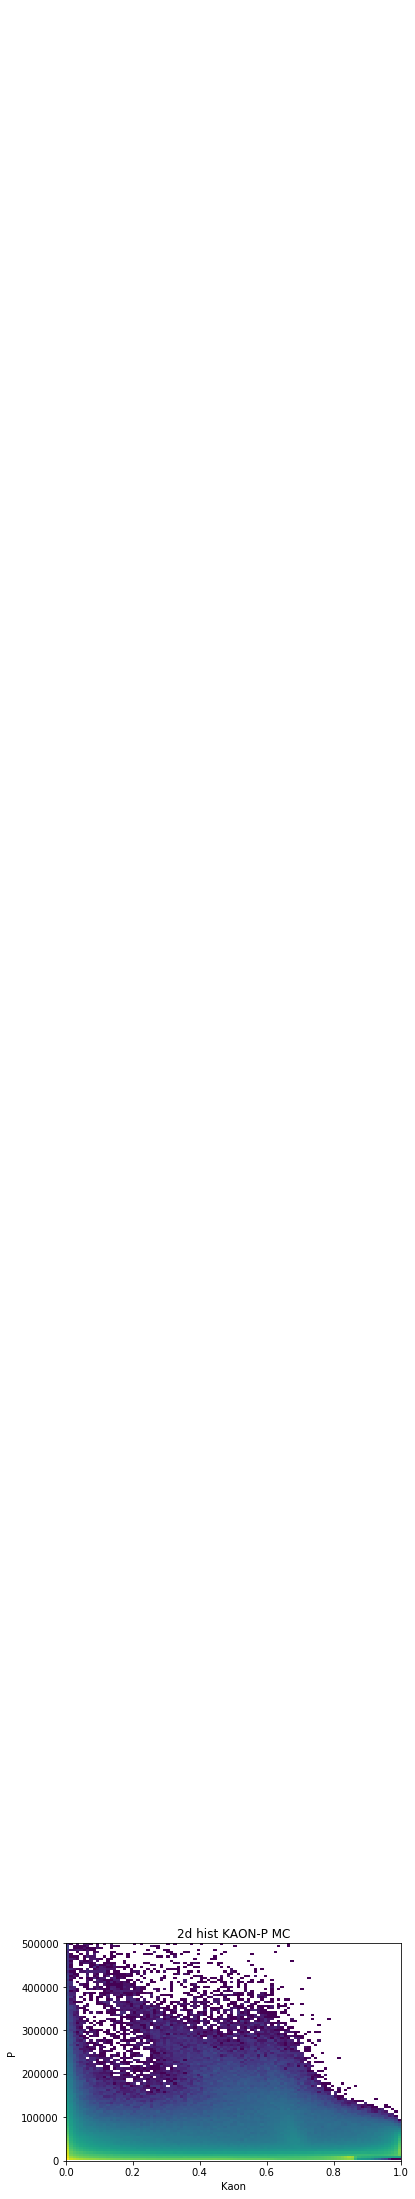

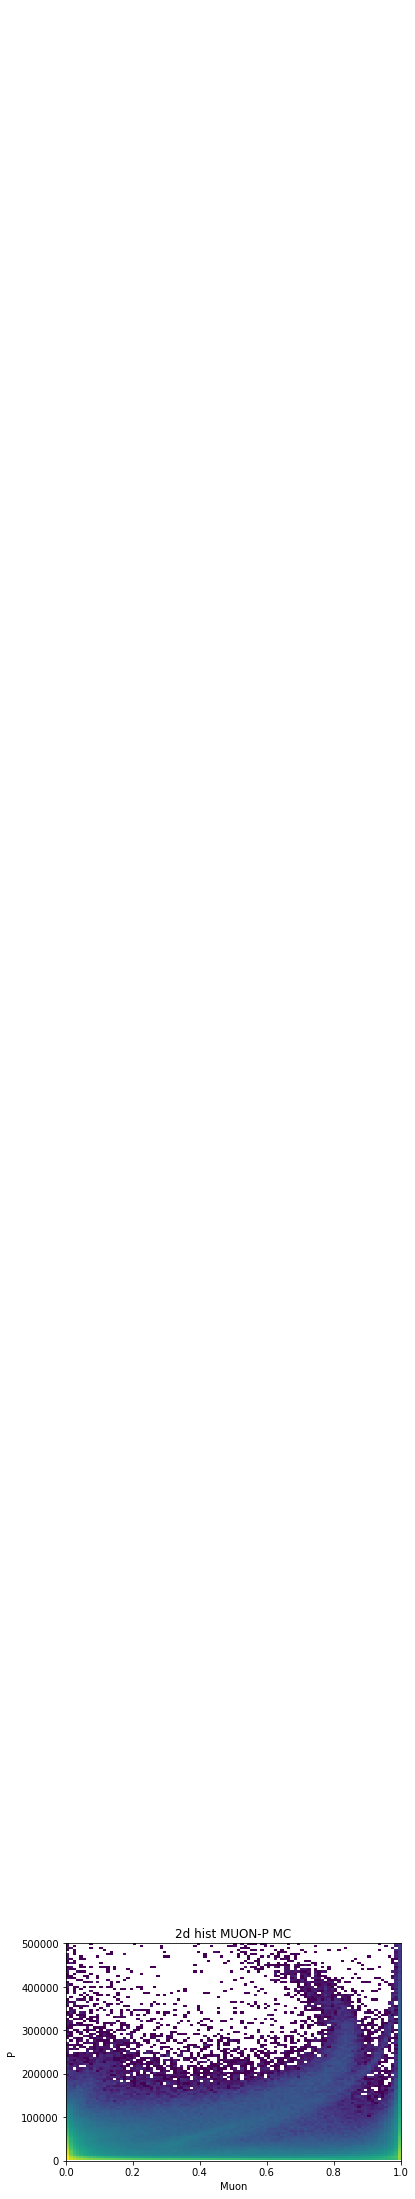

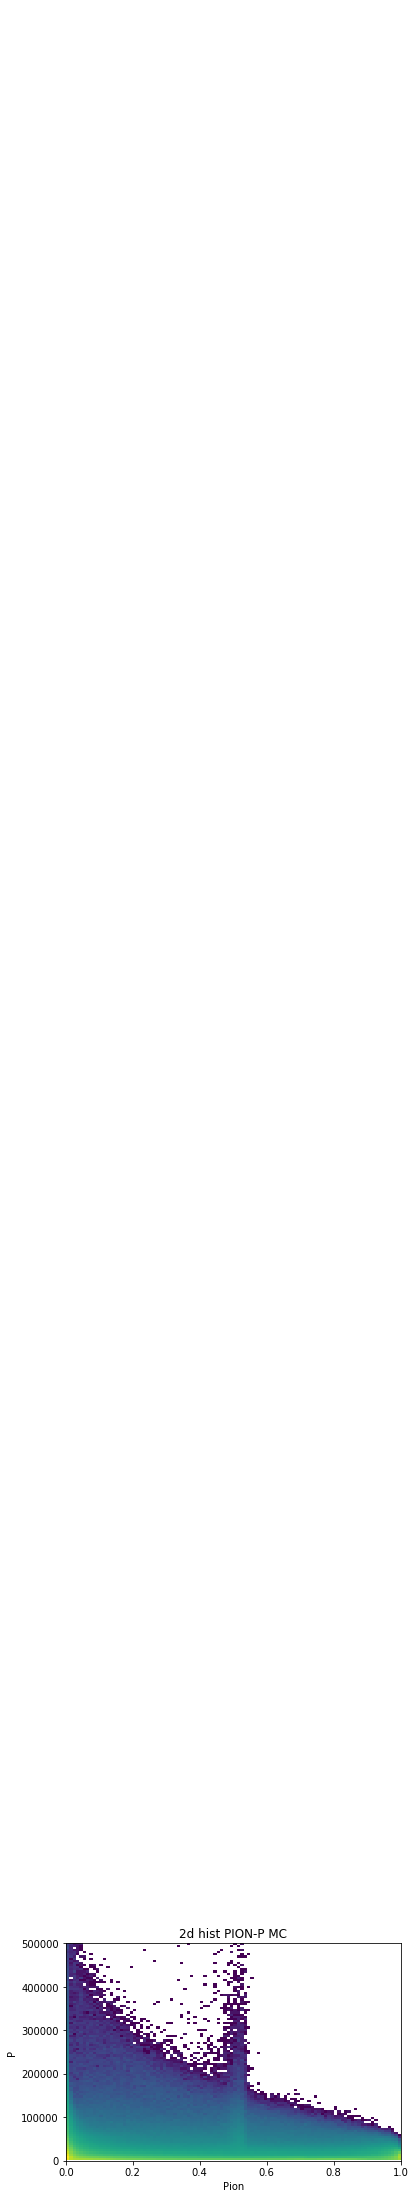

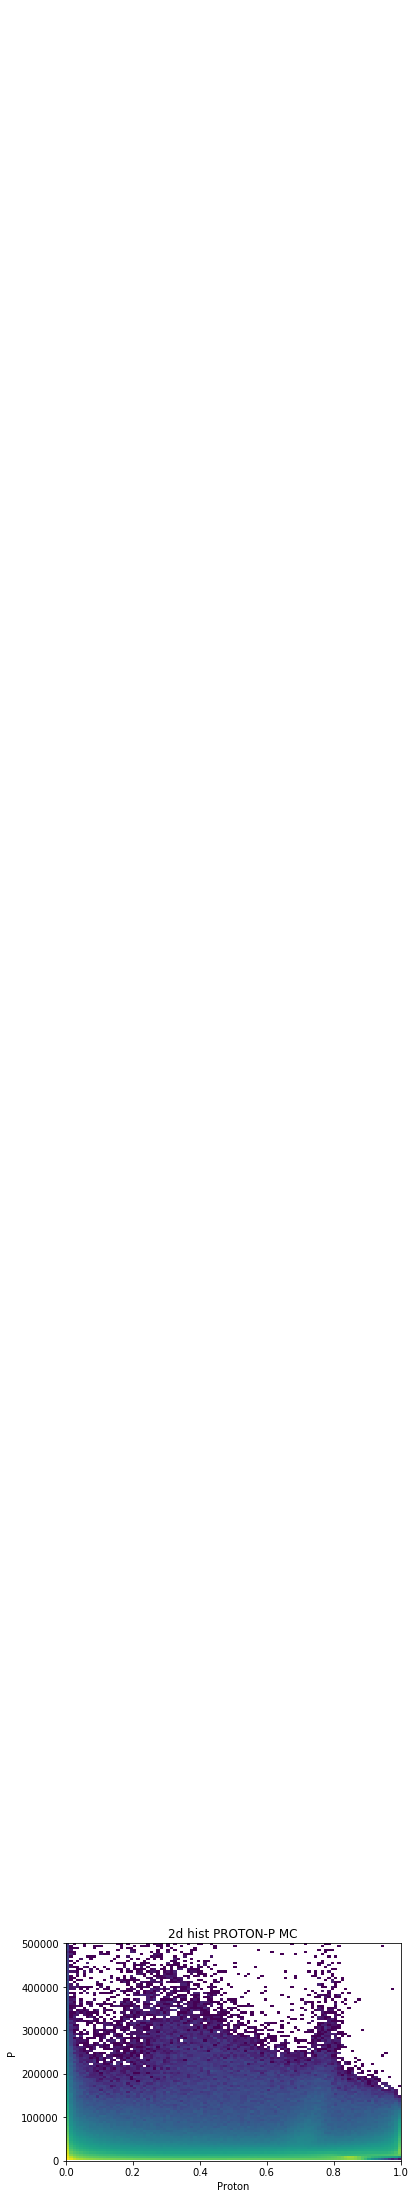

In [100]:
for particle_type in np.unique(data_real_balanced["Label"]):
    plot_h2d_hist(data_mc, particle_type, data_type="MC")

In [115]:
real_balanced_p = []

for i, p in enumerate(data_real_balanced["P"]):
    if p > 100000:
        real_balanced_p.append(100000)
        continue
    real_balanced_p.append(p)
    
mc_p = []
for p in data_mc["P"]:
    if p > 100000:
        mc_p.append(100000)
        continue
    mc_p.append(p)

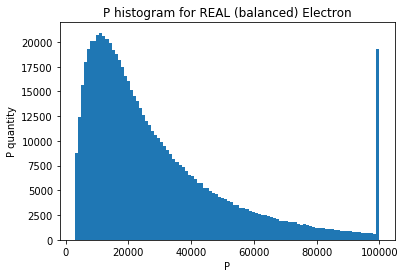

In [129]:
plt.hist(np.array(real_balanced_p)[data_real_balanced["Label"]=="Electron"], bins=100)
plt.title("P histogram for REAL (balanced) Electron")
plt.xlabel("P")
plt.ylabel("P quantity")
plt.show()

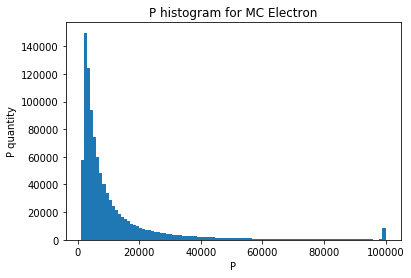

In [135]:
plt.hist(np.array(mc_p)[data_mc["Label"]=="Electron"], bins=100)
plt.title("P histogram for MC Electron")
plt.xlabel("P")
plt.ylabel("P quantity")
plt.show()

In [ ]:
plt.hist(data_mc["P"], bins=1000)

In [36]:
np.save("kaon_data.npy", kaon_data)

In [37]:
p_data = np.array(data_real["P"])
np.save("p_data.npy", p_data)

In [38]:
pt_data = np.array(data_real["Pt"])
np.save("pt_data.npy", pt_data)

In [137]:
percentile_electron_mc = np.percentile(data_mc[data_mc["Label"]=="Electron"]["P"], q=50)
percentile_electron_mc

6083.20019531

In [139]:
percentile_electron_real = np.percentile(data_real[data_real["Label"]=="Electron"]["P"], q=50)
percentile_electron_real

22131.2

In [140]:
percentile = 10000

In [144]:
real_train_data_p = data_real[data_real["P"]<percentile]["P"]
real_train_data_e = data_real[data_real["P"]<percentile]["Electron"]

real_test_data_p = data_real[data_real["P"]>=percentile]["P"]
real_test_data_e = data_real[data_real["P"]>=percentile]["Electron"]

In [143]:
mc_train_data_p = data_mc["P"]
mc_train_data_e = data_mc["Electron"]

In [145]:
np.save("real_train_data_p.npy", np.array(real_train_data_p))
np.save("real_train_data_e.npy", np.array(real_train_data_e))

np.save("mc_train_data_p.npy", np.array(mc_train_data_p))
np.save("mc_train_data_e.npy", np.array(mc_train_data_e))

np.save("real_test_data_p.npy", np.array(real_test_data_p))
np.save("real_test_data_e.npy", np.array(real_test_data_e))

In [149]:
mc_train_data_e[mc_train_data_p>60832-10][mc_train_data_p<60832+10]

13876      0.000055
43637      0.104968
44887      0.000031
67060      0.000067
70115      0.000063
74303      0.000164
103548     0.003673
105259     0.000005
140241     0.609711
179192     0.005566
180090     0.000026
183038     0.000005
185215     0.000048
192677     0.062134
205933     0.994869
258440     0.000920
260158     0.005981
261188     0.011504
272540     0.000152
386547     0.318743
390944     0.000240
445959     0.037770
477391     0.002155
588020     0.000009
696004     0.001526
768781     0.010100
779837     0.982499
892114     0.995205
904358     0.100147
937260     0.799777
             ...   
5069109    0.000040
5069544    0.000215
5110110    0.041303
5176384    0.002843
5192350    0.001058
5263715    0.001831
5272008    0.414310
5319243    0.001444
5325039    0.000566
5363011    0.004264
5392742    0.000314
5471608    0.000085
5520218    0.000197
5531731    0.047156
5551458    0.177921
5595259    0.317422
5601627    0.481493
5613915    0.000022
5675307    0.103586
